In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [16]:
import os

# Obtener la ruta absoluta del directorio actual
current_directory = os.getcwd()
print("Directorio actual de trabajo:", current_directory)

# Crear la ruta absoluta al archivo
path_to_file = os.path.join(current_directory, 'input', 'affinity-analysis', 'BreadBasket_DMS.csv')
print("Ruta absoluta al archivo:", path_to_file)

# Comprobar si el archivo existe en la ruta especificada
if os.path.isfile(path_to_file):
    # Cargar el archivo CSV
    bread_basket_data = pd.read_csv(path_to_file)
    # Mostrar las primeras 10 filas del DataFrame
    print(bread_basket_data.head(10))
else:
    print("El archivo no se encuentra en la ruta especificada.")



Directorio actual de trabajo: c:\Users\RODRIGO_CRUZ\Documents\Glish\Maestria\Tercer Cuatrimestre\Analitica de datos Masivos\Actividades phyton
Ruta absoluta al archivo: c:\Users\RODRIGO_CRUZ\Documents\Glish\Maestria\Tercer Cuatrimestre\Analitica de datos Masivos\Actividades phyton\input\affinity-analysis\BreadBasket_DMS.csv
         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam
5  2016-10-30  10:07:57            3        Cookies
6  2016-10-30  10:08:41            4         Muffin
7  2016-10-30  10:13:03            5         Coffee
8  2016-10-30  10:13:03            5         Pastry
9  2016-10-30  10:13:03            5          Bread


In [17]:
bread_basket_data.shape

(21293, 4)

In [18]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [19]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [20]:
bread_basket_data.shape

(21293, 4)

In [21]:
bread_basket_data['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [22]:
basket_items = {}

for item in bread_basket_data['Item']:
    if item in basket_items:
        basket_items[item] = basket_items[item] + 1
    else:
        basket_items[item] = 1

In [23]:
basket_items

{'Bread': 3325,
 'Scandinavian': 277,
 'Hot chocolate': 590,
 'Jam': 149,
 'Cookies': 540,
 'Muffin': 370,
 'Coffee': 5471,
 'Pastry': 856,
 'Medialuna': 616,
 'Tea': 1435,
 'NONE': 786,
 'Tartine': 47,
 'Basket': 6,
 'Mineral water': 136,
 'Farm House': 374,
 'Fudge': 159,
 'Juice': 369,
 "Ella's Kitchen Pouches": 17,
 'Victorian Sponge': 7,
 'Frittata': 81,
 'Hearty & Seasonal': 107,
 'Soup': 342,
 'Pick and Mix Bowls': 12,
 'Smoothies': 77,
 'Cake': 1025,
 'Mighty Protein': 11,
 'Chicken sand': 1,
 'Coke': 185,
 'My-5 Fruit Shoot': 18,
 'Focaccia': 54,
 'Sandwich': 771,
 'Alfajores': 369,
 'Eggs': 28,
 'Brownie': 379,
 'Dulce de Leche': 13,
 'Honey': 6,
 'The BART': 1,
 'Granola': 28,
 'Fairy Doors': 2,
 'Empanadas': 7,
 'Keeping It Local': 63,
 'Art Tray': 38,
 'Bowl Nic Pitt': 2,
 'Bread Pudding': 4,
 'Adjustment': 1,
 'Truffles': 193,
 'Chimichurri Oil': 2,
 'Bacon': 1,
 'Spread': 2,
 'Kids biscuit': 12,
 'Siblings': 2,
 'Caramel bites': 3,
 'Jammie Dodgers': 125,
 'Tiffin': 146,

In [24]:
item_names = []
item_frequencies = []

for key, val in basket_items.items():
    item_names.append(key)
    item_frequencies.append(val)

In [25]:
items_table = pd.DataFrame({'Names': item_names,
                            'Frequencies': item_frequencies})

items_table

,Names,Frequencies
0,Bread,3325
1,Scandinavian,277
2,Hot chocolate,590
3,Jam,149
4,Cookies,540
...,...,...
90,Gift voucher,1
91,Cherry me Dried fruit,3
92,Mortimer,5
93,Raw bars,1


In [26]:
items_table.sort_values('Frequencies', ascending=False).head()

,Names,Frequencies
6,Coffee,5471
0,Bread,3325
9,Tea,1435
24,Cake,1025
7,Pastry,856


<Axes: xlabel='Names'>

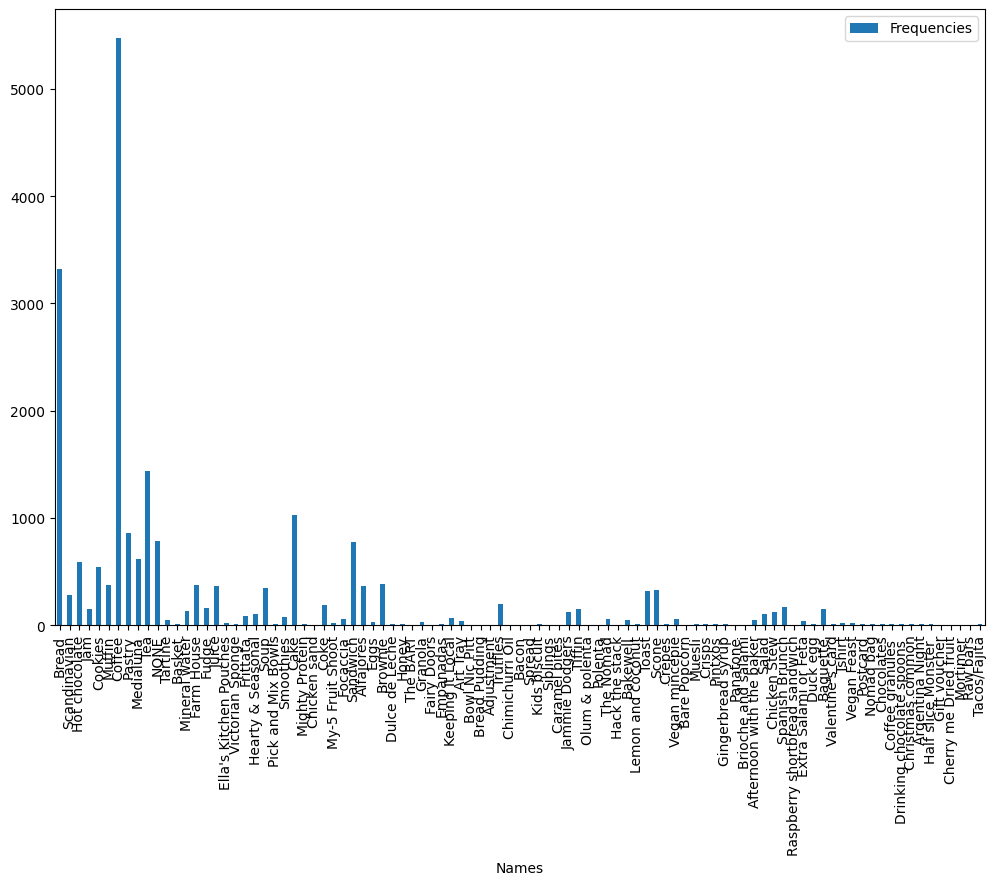

In [27]:
items_table.plot.bar(y='Frequencies', x='Names', figsize=(12, 8))

<Axes: xlabel='Names'>

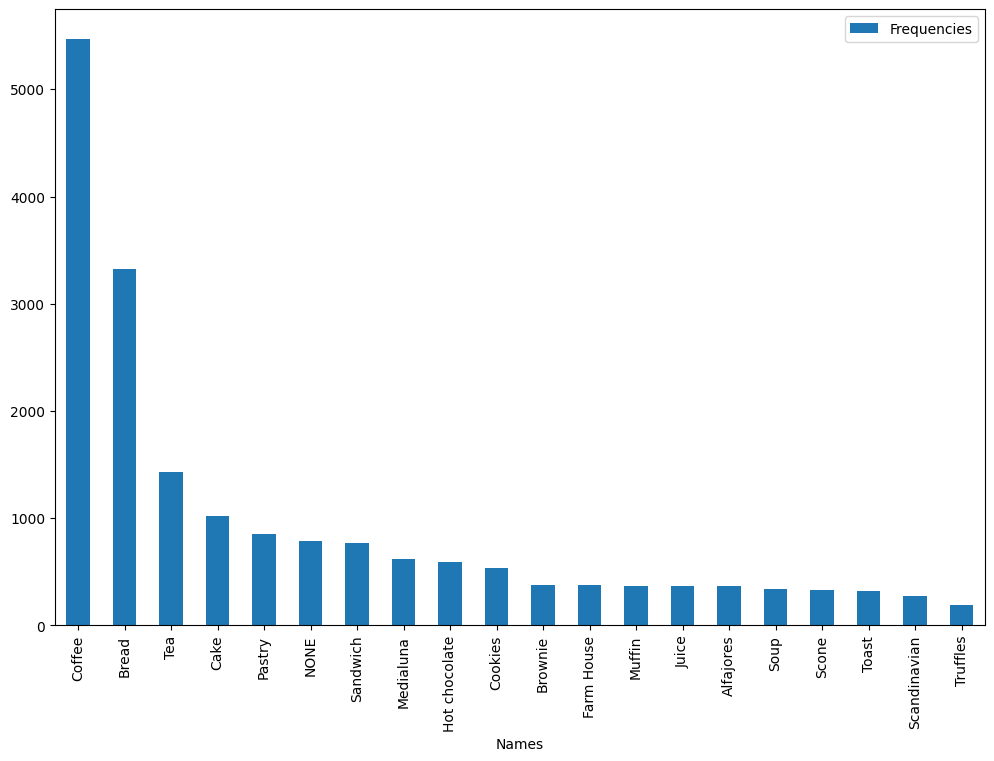

In [28]:
items_table.sort_values('Frequencies', ascending=False).head(20).\
    plot.bar(y='Frequencies', x='Names', figsize=(12, 8))

In [29]:
bread_basket_data['Transaction'].describe()

count    21293.000000
mean      4951.990889
std       2787.758400
min          1.000000
25%       2548.000000
50%       5067.000000
75%       7329.000000
max       9684.000000
Name: Transaction, dtype: float64

In [30]:
bread_basket_data = bread_basket_data.groupby('Transaction').agg(','.join).reset_index()

bread_basket_data = bread_basket_data.drop(['Date', 'Time'], axis=1)
bread_basket_data.head(10)

,Transaction,Item
0,1,Bread
1,2,"Scandinavian,Scandinavian"
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"
5,6,"Medialuna,Pastry,Muffin"
6,7,"Medialuna,Pastry,Coffee,Tea"
7,8,"Pastry,Bread"
8,9,"Bread,Muffin"
9,10,"Scandinavian,Medialuna"


In [31]:
bread_basket_data.shape

(9531, 2)

In [32]:
items_data = bread_basket_data['Item']

items_data.head(10)

0                          Bread
1      Scandinavian,Scandinavian
2      Hot chocolate,Jam,Cookies
3                         Muffin
4            Coffee,Pastry,Bread
5        Medialuna,Pastry,Muffin
6    Medialuna,Pastry,Coffee,Tea
7                   Pastry,Bread
8                   Bread,Muffin
9         Scandinavian,Medialuna
Name: Item, dtype: object

In [33]:
items_list = [item.split(',') for item in items_data]

items_list_df = pd.DataFrame({'Items': items_list})

items_list_df.head(10)

,Items
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
5,"[Medialuna, Pastry, Muffin]"
6,"[Medialuna, Pastry, Coffee, Tea]"
7,"[Pastry, Bread]"
8,"[Bread, Muffin]"
9,"[Scandinavian, Medialuna]"


In [34]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

transencoder = TransactionEncoder()

transencoder_array = transencoder.fit(items_list).transform(items_list)

In [35]:
encoded_df = pd.DataFrame(transencoder_array, columns=transencoder.columns_)

encoded_df.head(10)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
item_support_df = apriori(encoded_df, min_support=0.01, use_colnames=True)

item_support_df.shape

(63, 2)

In [37]:
item_support_df.sample(10)

,support,itemsets
19,0.079005,(NONE)
41,0.016892,"(Bread, Sandwich)"
13,0.014899,(Jam)
27,0.141643,(Tea)
8,0.054034,(Cookies)
5,0.012905,(Chicken Stew)
16,0.061379,(Medialuna)
22,0.071346,(Sandwich)
42,0.027909,"(Bread, Tea)"
26,0.018046,(Spanish Brunch)


In [38]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(item_support_df, 
                          metric='confidence', min_threshold=0.1)

rules.shape

(42, 10)

In [39]:
rules.sample(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493,0.210458
21,(Hot chocolate),(Coffee),0.057916,0.475081,0.029378,0.507246,1.067704,0.001863,1.065276,0.067309
33,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789,0.336791
36,(Tea),(Sandwich),0.141643,0.071346,0.014269,0.100741,1.412000,0.004164,1.032688,0.339934
35,(NONE),(Tea),0.079005,0.141643,0.018256,0.231076,1.631394,0.007066,1.116309,0.420228
22,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031,0.115155
37,(Sandwich),(Tea),0.071346,0.141643,0.014269,0.200000,1.412000,0.004164,1.072946,0.314202
25,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908,0.117145
38,"(Bread, Coffee)",(Pastry),0.089393,0.085510,0.011122,0.124413,1.454947,0.003478,1.044430,0.343386
17,(Hot chocolate),(Cake),0.057916,0.103137,0.011331,0.195652,1.897010,0.005358,1.115019,0.501924


In [40]:
rules.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789,0.336791
30,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493,0.210458
23,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561,0.176213
26,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079,0.152626
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861,0.125899
22,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031,0.115155
25,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908,0.117145
27,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468,0.115847
15,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667,0.109767
28,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310,0.094762


In [41]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
18,(Tea),(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,0.008999,1.076235,0.444078,1
23,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561,0.176213,1
32,(Coffee),(Tea),0.475081,0.141643,0.049523,0.104240,0.735936,-0.017769,0.958245,-0.406020,1
35,(NONE),(Tea),0.079005,0.141643,0.018256,0.231076,1.631394,0.007066,1.116309,0.420228,1
6,(Cookies),(Bread),0.054034,0.324940,0.014374,0.266019,0.818673,-0.003184,0.919725,-0.189719,1


In [42]:
rules[rules['antecedents'] == {'Juice'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
22,(Juice),(Coffee),0.038296,0.475081,0.02046,0.534247,1.124537,0.002266,1.127031,0.115155,1


In [43]:
rules[rules['antecedents'] == {'Cake'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
3,(Cake),(Bread),0.103137,0.324940,0.023187,0.224822,0.691888,-0.010326,0.870846,-0.331788,1
15,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667,0.109767,1
16,(Cake),(Hot chocolate),0.103137,0.057916,0.011331,0.109868,1.897010,0.005358,1.058364,0.527232,1
19,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146,0.425012,1


In [44]:
rules[rules['antecedents'] == {'Sandwich'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
11,(Sandwich),(Bread),0.071346,0.324940,0.016892,0.236765,0.728642,-0.006291,0.884472,-0.286238,1
27,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468,0.115847,1
37,(Sandwich),(Tea),0.071346,0.141643,0.014269,0.200000,1.412000,0.004164,1.072946,0.314202,1


In [45]:
#End of code